In [1]:
import requests
import pandas as pd
import io
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# 2.2
url = "https://data.ssb.no/api/v0/no/table/14091/"

def ssb_data(data): # Henter data fra SSB
    response = requests.post(url, json=data) # Sender POST-request til SSB API
    response.raise_for_status() #   Sjekker om responsen er OK
    return response.json() # Returnerer responsen som JSON

def konvert(respons):
    # Henter ut data og dimensjoner fra JSON-responsen
    data = respons['value'] # Henter ut data
    dimensjoner = respons['dimension'] #  Henter ut dimensjoner
    tid = dimensjoner['Tid']['category']['label'] # Henter tid-dimensjonen
    produkt = dimensjoner['Produk2']['category']['label'] # Henter produkt-dimensjonen

    # Lager en liste med rader for DataFrame
    rader = [] # Lager en tom liste
    for i, verdi in enumerate(data):  # Bruker enumerate for å iterere gjennom listen
        tid_id = list(tid.keys())[i]  # Henter tid_id fra tid-dictionary
        produkt_id = list(produkt.keys())[0]  # Henter produkt_id fra produkt-dictionary (antar at det bare er ett produkt)
        rader.append([produkt[produkt_id], tid[tid_id], verdi]) # Legger til en rad i listen

    # Lager DataFrame
    df = pd.DataFrame(rader, columns=['Produkt', 'Tid', 'Verdi']) # Lager en DataFrame
    return df # Returnerer DataFrame

data_y = { # Lager et data-objekt for å hente ut data for Y
  "query": [
    {
      "code": "Produk2",
      "selection": {
        "filter": "item",
        "values": [
          "1"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
    "2000M01", "2000M02", "2000M03", "2000M04", "2000M05", "2000M06", "2000M07", "2000M08", "2000M09", "2000M10", "2000M11", "2000M12",
    "2001M01", "2001M02", "2001M03", "2001M04", "2001M05", "2001M06", "2001M07", "2001M08", "2001M09", "2001M10", "2001M11", "2001M12",
    "2002M01", "2002M02", "2002M03", "2002M04", "2002M05", "2002M06", "2002M07", "2002M08", "2002M09", "2002M10", "2002M11", "2002M12",
    "2003M01", "2003M02", "2003M03", "2003M04", "2003M05", "2003M06", "2003M07", "2003M08", "2003M09", "2003M10", "2003M11", "2003M12",
    "2004M01", "2004M02", "2004M03", "2004M04", "2004M05", "2004M06", "2004M07", "2004M08", "2004M09", "2004M10", "2004M11", "2004M12",
    "2005M01", "2005M02", "2005M03", "2005M04", "2005M05", "2005M06", "2005M07", "2005M08", "2005M09", "2005M10", "2005M11", "2005M12",
    "2006M01", "2006M02", "2006M03", "2006M04", "2006M05", "2006M06", "2006M07", "2006M08", "2006M09", "2006M10", "2006M11", "2006M12",
    "2007M01", "2007M02", "2007M03", "2007M04", "2007M05", "2007M06", "2007M07", "2007M08", "2007M09", "2007M10", "2007M11", "2007M12",
    "2008M01", "2008M02", "2008M03", "2008M04", "2008M05", "2008M06", "2008M07", "2008M08", "2008M09", "2008M10", "2008M11", "2008M12",
    "2009M01", "2009M02", "2009M03", "2009M04", "2009M05", "2009M06", "2009M07", "2009M08", "2009M09", "2009M10", "2009M11", "2009M12",
    "2010M01", "2010M02", "2010M03", "2010M04", "2010M05", "2010M06", "2010M07", "2010M08", "2010M09", "2010M10", "2010M11", "2010M12",
    "2011M01", "2011M02", "2011M03", "2011M04", "2011M05", "2011M06", "2011M07", "2011M08", "2011M09", "2011M10", "2011M11", "2011M12",
    "2012M01", "2012M02", "2012M03", "2012M04", "2012M05", "2012M06", "2012M07", "2012M08", "2012M09", "2012M10", "2012M11", "2012M12",
    "2013M01", "2013M02", "2013M03", "2013M04", "2013M05", "2013M06", "2013M07", "2013M08", "2013M09", "2013M10", "2013M11", "2013M12",
    "2014M01", "2014M02", "2014M03", "2014M04", "2014M05", "2014M06", "2014M07", "2014M08", "2014M09", "2014M10", "2014M11", "2014M12",
    "2015M01", "2015M02", "2015M03", "2015M04", "2015M05", "2015M06", "2015M07", "2015M08", "2015M09", "2015M10", "2015M11", "2015M12",
    "2016M01", "2016M02", "2016M03", "2016M04", "2016M05", "2016M06", "2016M07", "2016M08", "2016M09", "2016M10", "2016M11", "2016M12",
    "2017M01", "2017M02", "2017M03", "2017M04", "2017M05", "2017M06", "2017M07", "2017M08", "2017M09", "2017M10", "2017M11", "2017M12",
    "2018M01", "2018M02", "2018M03", "2018M04", "2018M05", "2018M06", "2018M07", "2018M08", "2018M09", "2018M10", "2018M11", "2018M12",
    "2019M01", "2019M02", "2019M03", "2019M04", "2019M05", "2019M06", "2019M07", "2019M08", "2019M09", "2019M10", "2019M11", "2019M12",
    "2020M01", "2020M02", "2020M03", "2020M04", "2020M05", "2020M06", "2020M07", "2020M08", "2020M09", "2020M10", "2020M11", "2020M12",
    "2021M01", "2021M02", "2021M03", "2021M04", "2021M05", "2021M06", "2021M07", "2021M08", "2021M09", "2021M10", "2021M11", "2021M12",
    "2022M01", "2022M02", "2022M03", "2022M04", "2022M05", "2022M06", "2022M07", "2022M08", "2022M09", "2022M10", "2022M11", "2022M12",
    "2023M01", "2023M02", "2023M03", "2023M04", "2023M05", "2023M06", "2023M07", "2023M08", "2023M09", "2023M10", "2023M11", "2023M12",
    "2024M01", "2024M02", "2024M03", "2024M04", "2024M05", "2024M06", "2024M07", "2024M08", "2024M09", "2024M10", "2024M11", "2024M12",
    "2025M01" 
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

data_q = { # Lager et data-objekt for å hente ut data for X
  "query": [
    {
      "code": "Produk2",
      "selection": {
        "filter": "item",
        "values": [
          "2"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
    "2000M01", "2000M02", "2000M03", "2000M04", "2000M05", "2000M06", "2000M07", "2000M08", "2000M09", "2000M10", "2000M11", "2000M12",
    "2001M01", "2001M02", "2001M03", "2001M04", "2001M05", "2001M06", "2001M07", "2001M08", "2001M09", "2001M10", "2001M11", "2001M12",
    "2002M01", "2002M02", "2002M03", "2002M04", "2002M05", "2002M06", "2002M07", "2002M08", "2002M09", "2002M10", "2002M11", "2002M12",
    "2003M01", "2003M02", "2003M03", "2003M04", "2003M05", "2003M06", "2003M07", "2003M08", "2003M09", "2003M10", "2003M11", "2003M12",
    "2004M01", "2004M02", "2004M03", "2004M04", "2004M05", "2004M06", "2004M07", "2004M08", "2004M09", "2004M10", "2004M11", "2004M12",
    "2005M01", "2005M02", "2005M03", "2005M04", "2005M05", "2005M06", "2005M07", "2005M08", "2005M09", "2005M10", "2005M11", "2005M12",
    "2006M01", "2006M02", "2006M03", "2006M04", "2006M05", "2006M06", "2006M07", "2006M08", "2006M09", "2006M10", "2006M11", "2006M12",
    "2007M01", "2007M02", "2007M03", "2007M04", "2007M05", "2007M06", "2007M07", "2007M08", "2007M09", "2007M10", "2007M11", "2007M12",
    "2008M01", "2008M02", "2008M03", "2008M04", "2008M05", "2008M06", "2008M07", "2008M08", "2008M09", "2008M10", "2008M11", "2008M12",
    "2009M01", "2009M02", "2009M03", "2009M04", "2009M05", "2009M06", "2009M07", "2009M08", "2009M09", "2009M10", "2009M11", "2009M12",
    "2010M01", "2010M02", "2010M03", "2010M04", "2010M05", "2010M06", "2010M07", "2010M08", "2010M09", "2010M10", "2010M11", "2010M12",
    "2011M01", "2011M02", "2011M03", "2011M04", "2011M05", "2011M06", "2011M07", "2011M08", "2011M09", "2011M10", "2011M11", "2011M12",
    "2012M01", "2012M02", "2012M03", "2012M04", "2012M05", "2012M06", "2012M07", "2012M08", "2012M09", "2012M10", "2012M11", "2012M12",
    "2013M01", "2013M02", "2013M03", "2013M04", "2013M05", "2013M06", "2013M07", "2013M08", "2013M09", "2013M10", "2013M11", "2013M12",
    "2014M01", "2014M02", "2014M03", "2014M04", "2014M05", "2014M06", "2014M07", "2014M08", "2014M09", "2014M10", "2014M11", "2014M12",
    "2015M01", "2015M02", "2015M03", "2015M04", "2015M05", "2015M06", "2015M07", "2015M08", "2015M09", "2015M10", "2015M11", "2015M12",
    "2016M01", "2016M02", "2016M03", "2016M04", "2016M05", "2016M06", "2016M07", "2016M08", "2016M09", "2016M10", "2016M11", "2016M12",
    "2017M01", "2017M02", "2017M03", "2017M04", "2017M05", "2017M06", "2017M07", "2017M08", "2017M09", "2017M10", "2017M11", "2017M12",
    "2018M01", "2018M02", "2018M03", "2018M04", "2018M05", "2018M06", "2018M07", "2018M08", "2018M09", "2018M10", "2018M11", "2018M12",
    "2019M01", "2019M02", "2019M03", "2019M04", "2019M05", "2019M06", "2019M07", "2019M08", "2019M09", "2019M10", "2019M11", "2019M12",
    "2020M01", "2020M02", "2020M03", "2020M04", "2020M05", "2020M06", "2020M07", "2020M08", "2020M09", "2020M10", "2020M11", "2020M12",
    "2021M01", "2021M02", "2021M03", "2021M04", "2021M05", "2021M06", "2021M07", "2021M08", "2021M09", "2021M10", "2021M11", "2021M12",
    "2022M01", "2022M02", "2022M03", "2022M04", "2022M05", "2022M06", "2022M07", "2022M08", "2022M09", "2022M10", "2022M11", "2022M12",
    "2023M01", "2023M02", "2023M03", "2023M04", "2023M05", "2023M06", "2023M07", "2023M08", "2023M09", "2023M10", "2023M11", "2023M12",
    "2024M01", "2024M02", "2024M03", "2024M04", "2024M05", "2024M06", "2024M07", "2024M08", "2024M09", "2024M10", "2024M11", "2024M12",
    "2025M01" 
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

data_x = { # Lager et data-objekt for å hente ut data for X
  "query": [
    {
      "code": "Produk2",
      "selection": {
        "filter": "item",
        "values": [
          "3"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
            "2000M01", "2000M02", "2000M03", "2000M04", "2000M05", "2000M06", "2000M07", "2000M08", "2000M09", "2000M10", "2000M11", "2000M12",
    "2001M01", "2001M02", "2001M03", "2001M04", "2001M05", "2001M06", "2001M07", "2001M08", "2001M09", "2001M10", "2001M11", "2001M12",
    "2002M01", "2002M02", "2002M03", "2002M04", "2002M05", "2002M06", "2002M07", "2002M08", "2002M09", "2002M10", "2002M11", "2002M12",
    "2003M01", "2003M02", "2003M03", "2003M04", "2003M05", "2003M06", "2003M07", "2003M08", "2003M09", "2003M10", "2003M11", "2003M12",
    "2004M01", "2004M02", "2004M03", "2004M04", "2004M05", "2004M06", "2004M07", "2004M08", "2004M09", "2004M10", "2004M11", "2004M12",
    "2005M01", "2005M02", "2005M03", "2005M04", "2005M05", "2005M06", "2005M07", "2005M08", "2005M09", "2005M10", "2005M11", "2005M12",
    "2006M01", "2006M02", "2006M03", "2006M04", "2006M05", "2006M06", "2006M07", "2006M08", "2006M09", "2006M10", "2006M11", "2006M12",
    "2007M01", "2007M02", "2007M03", "2007M04", "2007M05", "2007M06", "2007M07", "2007M08", "2007M09", "2007M10", "2007M11", "2007M12",
    "2008M01", "2008M02", "2008M03", "2008M04", "2008M05", "2008M06", "2008M07", "2008M08", "2008M09", "2008M10", "2008M11", "2008M12",
    "2009M01", "2009M02", "2009M03", "2009M04", "2009M05", "2009M06", "2009M07", "2009M08", "2009M09", "2009M10", "2009M11", "2009M12",
    "2010M01", "2010M02", "2010M03", "2010M04", "2010M05", "2010M06", "2010M07", "2010M08", "2010M09", "2010M10", "2010M11", "2010M12",
    "2011M01", "2011M02", "2011M03", "2011M04", "2011M05", "2011M06", "2011M07", "2011M08", "2011M09", "2011M10", "2011M11", "2011M12",
    "2012M01", "2012M02", "2012M03", "2012M04", "2012M05", "2012M06", "2012M07", "2012M08", "2012M09", "2012M10", "2012M11", "2012M12",
    "2013M01", "2013M02", "2013M03", "2013M04", "2013M05", "2013M06", "2013M07", "2013M08", "2013M09", "2013M10", "2013M11", "2013M12",
    "2014M01", "2014M02", "2014M03", "2014M04", "2014M05", "2014M06", "2014M07", "2014M08", "2014M09", "2014M10", "2014M11", "2014M12",
    "2015M01", "2015M02", "2015M03", "2015M04", "2015M05", "2015M06", "2015M07", "2015M08", "2015M09", "2015M10", "2015M11", "2015M12",
    "2016M01", "2016M02", "2016M03", "2016M04", "2016M05", "2016M06", "2016M07", "2016M08", "2016M09", "2016M10", "2016M11", "2016M12",
    "2017M01", "2017M02", "2017M03", "2017M04", "2017M05", "2017M06", "2017M07", "2017M08", "2017M09", "2017M10", "2017M11", "2017M12",
    "2018M01", "2018M02", "2018M03", "2018M04", "2018M05", "2018M06", "2018M07", "2018M08", "2018M09", "2018M10", "2018M11", "2018M12",
    "2019M01", "2019M02", "2019M03", "2019M04", "2019M05", "2019M06", "2019M07", "2019M08", "2019M09", "2019M10", "2019M11", "2019M12",
    "2020M01", "2020M02", "2020M03", "2020M04", "2020M05", "2020M06", "2020M07", "2020M08", "2020M09", "2020M10", "2020M11", "2020M12",
    "2021M01", "2021M02", "2021M03", "2021M04", "2021M05", "2021M06", "2021M07", "2021M08", "2021M09", "2021M10", "2021M11", "2021M12",
    "2022M01", "2022M02", "2022M03", "2022M04", "2022M05", "2022M06", "2022M07", "2022M08", "2022M09", "2022M10", "2022M11", "2022M12",
    "2023M01", "2023M02", "2023M03", "2023M04", "2023M05", "2023M06", "2023M07", "2023M08", "2023M09", "2023M10", "2023M11", "2023M12",
    "2024M01", "2024M02", "2024M03", "2024M04", "2024M05", "2024M06", "2024M07", "2024M08", "2024M09", "2024M10", "2024M11", "2024M12",
    "2025M01" 
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

data_fb = { # Lager et data-objekt for å hente ut data for X
  "query": [
    {
      "code": "Produk2",
      "selection": {
        "filter": "item",
        "values": [
          "7.41"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
            "2000M01", "2000M02", "2000M03", "2000M04", "2000M05", "2000M06", "2000M07", "2000M08", "2000M09", "2000M10", "2000M11", "2000M12",
    "2001M01", "2001M02", "2001M03", "2001M04", "2001M05", "2001M06", "2001M07", "2001M08", "2001M09", "2001M10", "2001M11", "2001M12",
    "2002M01", "2002M02", "2002M03", "2002M04", "2002M05", "2002M06", "2002M07", "2002M08", "2002M09", "2002M10", "2002M11", "2002M12",
    "2003M01", "2003M02", "2003M03", "2003M04", "2003M05", "2003M06", "2003M07", "2003M08", "2003M09", "2003M10", "2003M11", "2003M12",
    "2004M01", "2004M02", "2004M03", "2004M04", "2004M05", "2004M06", "2004M07", "2004M08", "2004M09", "2004M10", "2004M11", "2004M12",
    "2005M01", "2005M02", "2005M03", "2005M04", "2005M05", "2005M06", "2005M07", "2005M08", "2005M09", "2005M10", "2005M11", "2005M12",
    "2006M01", "2006M02", "2006M03", "2006M04", "2006M05", "2006M06", "2006M07", "2006M08", "2006M09", "2006M10", "2006M11", "2006M12",
    "2007M01", "2007M02", "2007M03", "2007M04", "2007M05", "2007M06", "2007M07", "2007M08", "2007M09", "2007M10", "2007M11", "2007M12",
    "2008M01", "2008M02", "2008M03", "2008M04", "2008M05", "2008M06", "2008M07", "2008M08", "2008M09", "2008M10", "2008M11", "2008M12",
    "2009M01", "2009M02", "2009M03", "2009M04", "2009M05", "2009M06", "2009M07", "2009M08", "2009M09", "2009M10", "2009M11", "2009M12",
    "2010M01", "2010M02", "2010M03", "2010M04", "2010M05", "2010M06", "2010M07", "2010M08", "2010M09", "2010M10", "2010M11", "2010M12",
    "2011M01", "2011M02", "2011M03", "2011M04", "2011M05", "2011M06", "2011M07", "2011M08", "2011M09", "2011M10", "2011M11", "2011M12",
    "2012M01", "2012M02", "2012M03", "2012M04", "2012M05", "2012M06", "2012M07", "2012M08", "2012M09", "2012M10", "2012M11", "2012M12",
    "2013M01", "2013M02", "2013M03", "2013M04", "2013M05", "2013M06", "2013M07", "2013M08", "2013M09", "2013M10", "2013M11", "2013M12",
    "2014M01", "2014M02", "2014M03", "2014M04", "2014M05", "2014M06", "2014M07", "2014M08", "2014M09", "2014M10", "2014M11", "2014M12",
    "2015M01", "2015M02", "2015M03", "2015M04", "2015M05", "2015M06", "2015M07", "2015M08", "2015M09", "2015M10", "2015M11", "2015M12",
    "2016M01", "2016M02", "2016M03", "2016M04", "2016M05", "2016M06", "2016M07", "2016M08", "2016M09", "2016M10", "2016M11", "2016M12",
    "2017M01", "2017M02", "2017M03", "2017M04", "2017M05", "2017M06", "2017M07", "2017M08", "2017M09", "2017M10", "2017M11", "2017M12",
    "2018M01", "2018M02", "2018M03", "2018M04", "2018M05", "2018M06", "2018M07", "2018M08", "2018M09", "2018M10", "2018M11", "2018M12",
    "2019M01", "2019M02", "2019M03", "2019M04", "2019M05", "2019M06", "2019M07", "2019M08", "2019M09", "2019M10", "2019M11", "2019M12",
    "2020M01", "2020M02", "2020M03", "2020M04", "2020M05", "2020M06", "2020M07", "2020M08", "2020M09", "2020M10", "2020M11", "2020M12",
    "2021M01", "2021M02", "2021M03", "2021M04", "2021M05", "2021M06", "2021M07", "2021M08", "2021M09", "2021M10", "2021M11", "2021M12",
    "2022M01", "2022M02", "2022M03", "2022M04", "2022M05", "2022M06", "2022M07", "2022M08", "2022M09", "2022M10", "2022M11", "2022M12",
    "2023M01", "2023M02", "2023M03", "2023M04", "2023M05", "2023M06", "2023M07", "2023M08", "2023M09", "2023M10", "2023M11", "2023M12",
    "2024M01", "2024M02", "2024M03", "2024M04", "2024M05", "2024M06", "2024M07", "2024M08", "2024M09", "2024M10", "2024M11", "2024M12",
    "2025M01" 
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

data_fh = {
  "query": [
    {
      "code": "Produk2",
      "selection": {
        "filter": "item",
        "values": [
          "7.42"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
                    "2000M01", "2000M02", "2000M03", "2000M04", "2000M05", "2000M06", "2000M07", "2000M08", "2000M09", "2000M10", "2000M11", "2000M12",
    "2001M01", "2001M02", "2001M03", "2001M04", "2001M05", "2001M06", "2001M07", "2001M08", "2001M09", "2001M10", "2001M11", "2001M12",
    "2002M01", "2002M02", "2002M03", "2002M04", "2002M05", "2002M06", "2002M07", "2002M08", "2002M09", "2002M10", "2002M11", "2002M12",
    "2003M01", "2003M02", "2003M03", "2003M04", "2003M05", "2003M06", "2003M07", "2003M08", "2003M09", "2003M10", "2003M11", "2003M12",
    "2004M01", "2004M02", "2004M03", "2004M04", "2004M05", "2004M06", "2004M07", "2004M08", "2004M09", "2004M10", "2004M11", "2004M12",
    "2005M01", "2005M02", "2005M03", "2005M04", "2005M05", "2005M06", "2005M07", "2005M08", "2005M09", "2005M10", "2005M11", "2005M12",
    "2006M01", "2006M02", "2006M03", "2006M04", "2006M05", "2006M06", "2006M07", "2006M08", "2006M09", "2006M10", "2006M11", "2006M12",
    "2007M01", "2007M02", "2007M03", "2007M04", "2007M05", "2007M06", "2007M07", "2007M08", "2007M09", "2007M10", "2007M11", "2007M12",
    "2008M01", "2008M02", "2008M03", "2008M04", "2008M05", "2008M06", "2008M07", "2008M08", "2008M09", "2008M10", "2008M11", "2008M12",
    "2009M01", "2009M02", "2009M03", "2009M04", "2009M05", "2009M06", "2009M07", "2009M08", "2009M09", "2009M10", "2009M11", "2009M12",
    "2010M01", "2010M02", "2010M03", "2010M04", "2010M05", "2010M06", "2010M07", "2010M08", "2010M09", "2010M10", "2010M11", "2010M12",
    "2011M01", "2011M02", "2011M03", "2011M04", "2011M05", "2011M06", "2011M07", "2011M08", "2011M09", "2011M10", "2011M11", "2011M12",
    "2012M01", "2012M02", "2012M03", "2012M04", "2012M05", "2012M06", "2012M07", "2012M08", "2012M09", "2012M10", "2012M11", "2012M12",
    "2013M01", "2013M02", "2013M03", "2013M04", "2013M05", "2013M06", "2013M07", "2013M08", "2013M09", "2013M10", "2013M11", "2013M12",
    "2014M01", "2014M02", "2014M03", "2014M04", "2014M05", "2014M06", "2014M07", "2014M08", "2014M09", "2014M10", "2014M11", "2014M12",
    "2015M01", "2015M02", "2015M03", "2015M04", "2015M05", "2015M06", "2015M07", "2015M08", "2015M09", "2015M10", "2015M11", "2015M12",
    "2016M01", "2016M02", "2016M03", "2016M04", "2016M05", "2016M06", "2016M07", "2016M08", "2016M09", "2016M10", "2016M11", "2016M12",
    "2017M01", "2017M02", "2017M03", "2017M04", "2017M05", "2017M06", "2017M07", "2017M08", "2017M09", "2017M10", "2017M11", "2017M12",
    "2018M01", "2018M02", "2018M03", "2018M04", "2018M05", "2018M06", "2018M07", "2018M08", "2018M09", "2018M10", "2018M11", "2018M12",
    "2019M01", "2019M02", "2019M03", "2019M04", "2019M05", "2019M06", "2019M07", "2019M08", "2019M09", "2019M10", "2019M11", "2019M12",
    "2020M01", "2020M02", "2020M03", "2020M04", "2020M05", "2020M06", "2020M07", "2020M08", "2020M09", "2020M10", "2020M11", "2020M12",
    "2021M01", "2021M02", "2021M03", "2021M04", "2021M05", "2021M06", "2021M07", "2021M08", "2021M09", "2021M10", "2021M11", "2021M12",
    "2022M01", "2022M02", "2022M03", "2022M04", "2022M05", "2022M06", "2022M07", "2022M08", "2022M09", "2022M10", "2022M11", "2022M12",
    "2023M01", "2023M02", "2023M03", "2023M04", "2023M05", "2023M06", "2023M07", "2023M08", "2023M09", "2023M10", "2023M11", "2023M12",
    "2024M01", "2024M02", "2024M03", "2024M04", "2024M05", "2024M06", "2024M07", "2024M08", "2024M09", "2024M10", "2024M11", "2024M12",
    "2025M01" 
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

# Henter dataene og konverterer til DataFrames
df_y = konvert(ssb_data(data_y)) 
df_q = konvert(ssb_data(data_q))
df_x = konvert(ssb_data(data_x))
df_fb = konvert(ssb_data(data_fb))
df_fh = konvert(ssb_data(data_fh))
df_q

,Produkt,Tid,Verdi
0,Import,2000M01,294841
1,Import,2000M02,242696
2,Import,2000M03,90648
3,Import,2000M04,65208
4,Import,2000M05,37999
...,...,...,...
296,Import,2024M09,1081035
297,Import,2024M10,1281038
298,Import,2024M11,1002181
299,Import,2024M12,1103533


In [3]:
# Priser
url = 'https://data.ssb.no/api/v0/no/table/09364/'
data_p = {
  "query": [
    {
      "code": "Kraftpriser",
      "selection": {
        "filter": "item",
        "values": [
          "01"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "KraftprisIA"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

def konvert_p(respons):
    # Henter ut data og dimensjoner fra JSON-responsen
    data = respons['value']
    dimensjoner = respons['dimension']
    tid = dimensjoner['Tid']['category']['label']
    kraftpriser = dimensjoner['Kraftpriser']['category']['label']

    # Lager en liste med rader for DataFrame
    rader = []
    for i, verdi in enumerate(data):  # Bruker enumerate for å iterere gjennom listen
        tid_id = list(tid.keys())[i]  # Henter tid_id fra tid-dictionary
        kraftpriser_id = list(kraftpriser.keys())[0]  # Henter kraftpriser_id fra kraftpriser-dictionary (antar at det bare er ett kraftpriser)
        rader.append([kraftpriser[kraftpriser_id], tid[tid_id], verdi])

    # Lager DataFrame
    df = pd.DataFrame(rader, columns=['Kraftpriser', 'Tid', 'Verdi'])
    return df

df_p = konvert_p(ssb_data(data_p))

df_p

,Kraftpriser,Tid,Verdi
0,HUSHOLDNINGER,2012K1,42.0
1,HUSHOLDNINGER,2012K2,31.8
2,HUSHOLDNINGER,2012K3,24.3
3,HUSHOLDNINGER,2012K4,37.1
4,HUSHOLDNINGER,2013K1,42.6
5,HUSHOLDNINGER,2013K2,42.2
6,HUSHOLDNINGER,2013K3,40.6
7,HUSHOLDNINGER,2013K4,43.4
8,HUSHOLDNINGER,2014K1,38.4
9,HUSHOLDNINGER,2014K2,32.5


In [4]:
# Funksjon for å konvertere YYYYKn til DateTime
def konverter_kvartal_til_datetime(kvartal): # Funksjonen tar inn en streng med formatet YYYYKn
    ar = int(kvartal[:4]) # Henter ut årstallet fra de fire første tegnene i strengen
    kvartal_nummer = int(kvartal[5]) # Henter ut kvartalsnummeret fra det sjette tegnet i strengen
    maned = (kvartal_nummer - 1) * 3 + 1 # Regner ut måneden basert på kvartalsnummeret
    return pd.to_datetime(f'{ar}-{maned:02}-01') # Returnerer en DateTime for første dag i kvartalet

# Anvende funksjonen på 'Tid'-kolonnen
df_p['DateTime'] = df_p['Tid'].apply(konverter_kvartal_til_datetime)

# Vis DataFrame med DateTime-kolonne
print(df_p)

      Kraftpriser     Tid  Verdi   DateTime
0   HUSHOLDNINGER  2012K1   42.0 2012-01-01
1   HUSHOLDNINGER  2012K2   31.8 2012-04-01
2   HUSHOLDNINGER  2012K3   24.3 2012-07-01
3   HUSHOLDNINGER  2012K4   37.1 2012-10-01
4   HUSHOLDNINGER  2013K1   42.6 2013-01-01
5   HUSHOLDNINGER  2013K2   42.2 2013-04-01
6   HUSHOLDNINGER  2013K3   40.6 2013-07-01
7   HUSHOLDNINGER  2013K4   43.4 2013-10-01
8   HUSHOLDNINGER  2014K1   38.4 2014-01-01
9   HUSHOLDNINGER  2014K2   32.5 2014-04-01
10  HUSHOLDNINGER  2014K3   38.5 2014-07-01
11  HUSHOLDNINGER  2014K4   38.7 2014-10-01
12  HUSHOLDNINGER  2015K1   38.1 2015-01-01
13  HUSHOLDNINGER  2015K2   31.7 2015-04-01
14  HUSHOLDNINGER  2015K3   24.4 2015-07-01
15  HUSHOLDNINGER  2015K4   31.6 2015-10-01
16  HUSHOLDNINGER  2016K1   35.0 2016-01-01
17  HUSHOLDNINGER  2016K2   35.1 2016-04-01
18  HUSHOLDNINGER  2016K3   37.2 2016-07-01
19  HUSHOLDNINGER  2016K4   45.8 2016-10-01
20  HUSHOLDNINGER  2017K1   41.9 2017-01-01
21  HUSHOLDNINGER  2017K2   40.4

In [5]:
df_p = df_p[(df_p['Tid'] >= '2020K1') & (df_p['Tid'] <= '2025K1')]

In [6]:
def konverter_verdi_til_numerisk(dataframes): # Funksjonen tar inn en liste med DataFrames
    """
    Konverterer kolonnen 'Verdi' til numerisk data for en liste med DataFrames.

    Args:
        dataframes (list): En liste med Pandas DataFrames.
    """
    for df_navn, df in dataframes.items(): #  DataFrame-navn og DataFrame-objekter
        try:
            df['Verdi'] = pd.to_numeric(df['Verdi']) # Konverterer kolonnen 'Verdi' til numerisk data
            print(f"Kolonnen 'Verdi' i {df_navn} ble konvertert til numerisk data.") # Skriver ut en bekreftelse
            print(f"Datatype i {df_navn}['Verdi']: {df['Verdi'].dtype}")  # Skriver ut datatypen etter konvertering
        except KeyError:
            print(f"Kolonnen 'Verdi' finnes ikke i {df_navn}.") # Skriver ut en feilmelding hvis kolonnen ikke finnes
        except ValueError:
            print(f"Kan ikke konvertere kolonnen 'Verdi' i {df_navn} til numerisk data. Sjekk om dataene inneholder ikke-numeriske verdier.")

# Lag en ordbok med df-ene dine
dfs = {
    'df_y': df_y,
    'df_q': df_q,
    'df_x': df_x,
    'df_fb': df_fb,
    'df_fh': df_fh
}

# Kall funksjonen med ordboken av df-ene dine
konverter_verdi_til_numerisk(dfs)

Kolonnen 'Verdi' i df_y ble konvertert til numerisk data.
Datatype i df_y['Verdi']: int64
Kolonnen 'Verdi' i df_q ble konvertert til numerisk data.
Datatype i df_q['Verdi']: int64
Kolonnen 'Verdi' i df_x ble konvertert til numerisk data.
Datatype i df_x['Verdi']: int64
Kolonnen 'Verdi' i df_fb ble konvertert til numerisk data.
Datatype i df_fb['Verdi']: float64
Kolonnen 'Verdi' i df_fh ble konvertert til numerisk data.
Datatype i df_fh['Verdi']: float64


In [7]:
# 1. Beregn forskjellen
df_yx = df_y.copy()  # Kopier df_y for å unngå SettingWithCopyWarning
df_yx['Verdi'] = df_y['Verdi'] - df_x['Verdi']

# 2. Beregn totalsummen
total_produksjon = df_yx['Verdi'].sum()

# 3. Finn indeksen til raden som skal erstattes
indeks_total_produksjon = df_yx[df_yx['Produkt'] == 'Total produksjon av elektrisk kraft'].index

# 4. Oppdater raden med totalsummen eller legg til ny rad hvis den ikke finnes
if not indeks_total_produksjon.empty:
    # Endre navnet på produktet
    df_yx.loc[indeks_total_produksjon[0: ,], 'Produkt'] = 'Tot.produksjon av el.kraft i Norge til Norge (10 Mill.)'
else:
    # Hvis raden ikke finnes, legg til en ny rad
    ny_rad = pd.DataFrame([{'Tid': df_yx['Tid'].iloc[0], 'Produkt': 'Tot.produksjon av el.kraft i Norge til Norge (10 Mill.)', 'Verdi': total_produksjon}])
    df_yx = pd.concat([df_yx, ny_rad], ignore_index=True)

df_yx['Verdi'] = df_yx['Verdi']/10

print(df_yx)

                                               Produkt      Tid      Verdi
0    Tot.produksjon av el.kraft i Norge til Norge (...  2000M01  1246264.8
1    Tot.produksjon av el.kraft i Norge til Norge (...  2000M02  1169553.8
2    Tot.produksjon av el.kraft i Norge til Norge (...  2000M03  1225939.3
3    Tot.produksjon av el.kraft i Norge til Norge (...  2000M04  1034175.8
4    Tot.produksjon av el.kraft i Norge til Norge (...  2000M05   907557.9
..                                                 ...      ...        ...
296  Tot.produksjon av el.kraft i Norge til Norge (...  2024M09   864439.8
297  Tot.produksjon av el.kraft i Norge til Norge (...  2024M10  1018117.0
298  Tot.produksjon av el.kraft i Norge til Norge (...  2024M11  1170148.9
299  Tot.produksjon av el.kraft i Norge til Norge (...  2024M12  1269602.8
300  Tot.produksjon av el.kraft i Norge til Norge (...  2025M01  1390371.5

[301 rows x 3 columns]


In [8]:
df_b = df_fb.copy()
df_b['Verdi'] = df_fb['Verdi'] - df_fh['Verdi']

# 2. Beregn totalsummen
total_boliger = df_b['Verdi'].sum()

# 3. Finn indeksen til raden som skal erstattes
indeks_boliger = df_b[df_b['Produkt'] == 'Forbruk i boliger'].index

# 4. Oppdater raden med totalsummen eller legg til ny rad hvis den ikke finnes
if not indeks_total_produksjon.empty:
    # Endre navnet på produktet
    df_b.loc[indeks_boliger[0: ,], 'Produkt'] = 'Forbruk i alle typer husstander (Mill.)'
else:
    # Hvis raden ikke finnes, legg til en ny rad
    ny_rad = pd.DataFrame([{'Tid': df_b['Tid'].iloc[0], 'Produkt': 'Forbruk i alle typer husstander (Mill.)', 'Verdi': total_produksjon}])
    df_b = pd.concat([df_b, ny_rad], ignore_index=True)

df_b['Verdi'] = df_b['Verdi']/2

print(df_b)

                                     Produkt      Tid      Verdi
0    Forbruk i alle typer husstander (Mill.)  2000M01        NaN
1    Forbruk i alle typer husstander (Mill.)  2000M02        NaN
2    Forbruk i alle typer husstander (Mill.)  2000M03        NaN
3    Forbruk i alle typer husstander (Mill.)  2000M04        NaN
4    Forbruk i alle typer husstander (Mill.)  2000M05        NaN
..                                       ...      ...        ...
296  Forbruk i alle typer husstander (Mill.)  2024M09  1048552.5
297  Forbruk i alle typer husstander (Mill.)  2024M10  1433127.0
298  Forbruk i alle typer husstander (Mill.)  2024M11  1807900.0
299  Forbruk i alle typer husstander (Mill.)  2024M12  2070442.0
300  Forbruk i alle typer husstander (Mill.)  2025M01  2281341.5

[301 rows x 3 columns]


In [9]:
# Endre 'Import' til 'Import i Mill.'
df_q.loc[df_q['Produkt'] == 'Import', 'Produkt'] = 'Import (Mill.)'
df_q

,Produkt,Tid,Verdi
0,Import (Mill.),2000M01,294841
1,Import (Mill.),2000M02,242696
2,Import (Mill.),2000M03,90648
3,Import (Mill.),2000M04,65208
4,Import (Mill.),2000M05,37999
...,...,...,...
296,Import (Mill.),2024M09,1081035
297,Import (Mill.),2024M10,1281038
298,Import (Mill.),2024M11,1002181
299,Import (Mill.),2024M12,1103533


In [10]:
combined_df = pd.concat([df_yx, df_q, df_b], ignore_index=True) # Slår sammen DataFrames
combined_df

,Produkt,Tid,Verdi
0,Tot.produksjon av el.kraft i Norge til Norge (...,2000M01,1246264.8
1,Tot.produksjon av el.kraft i Norge til Norge (...,2000M02,1169553.8
2,Tot.produksjon av el.kraft i Norge til Norge (...,2000M03,1225939.3
3,Tot.produksjon av el.kraft i Norge til Norge (...,2000M04,1034175.8
4,Tot.produksjon av el.kraft i Norge til Norge (...,2000M05,907557.9
...,...,...,...
898,Forbruk i alle typer husstander (Mill.),2024M09,1048552.5
899,Forbruk i alle typer husstander (Mill.),2024M10,1433127.0
900,Forbruk i alle typer husstander (Mill.),2024M11,1807900.0
901,Forbruk i alle typer husstander (Mill.),2024M12,2070442.0


In [11]:
combined_df = combined_df[(combined_df['Tid'] >= '2020M01') & (combined_df['Tid'] <= '2025M01')] # Filtrerer ut data for perioden 2020M01 til 2025M01
combined_df

,Produkt,Tid,Verdi
240,Tot.produksjon av el.kraft i Norge til Norge (...,2020M01,1238988.9
241,Tot.produksjon av el.kraft i Norge til Norge (...,2020M02,1184475.6
242,Tot.produksjon av el.kraft i Norge til Norge (...,2020M03,1250099.7
243,Tot.produksjon av el.kraft i Norge til Norge (...,2020M04,1061401.3
244,Tot.produksjon av el.kraft i Norge til Norge (...,2020M05,999660.7
...,...,...,...
898,Forbruk i alle typer husstander (Mill.),2024M09,1048552.5
899,Forbruk i alle typer husstander (Mill.),2024M10,1433127.0
900,Forbruk i alle typer husstander (Mill.),2024M11,1807900.0
901,Forbruk i alle typer husstander (Mill.),2024M12,2070442.0


In [12]:
pivot_df = combined_df.pivot(index='Tid', columns='Produkt', values='Verdi').reset_index() # lager  et datasett med tid som index og produkt som kolonner
pivot_df

Produkt,Tid,Forbruk i alle typer husstander (Mill.),Import (Mill.),Tot.produksjon av el.kraft i Norge til Norge (10 Mill.)
0,2020M01,1933112.5,1067388.0,1238988.9
1,2020M02,1890974.5,949147.0,1184475.6
2,2020M03,1955728.5,597807.0,1250099.7
3,2020M04,1581818.5,401557.0,1061401.3
4,2020M05,1352738.5,266950.0,999660.7
...,...,...,...,...
56,2024M09,1048552.5,1081035.0,864439.8
57,2024M10,1433127.0,1281038.0,1018117.0
58,2024M11,1807900.0,1002181.0,1170148.9
59,2024M12,2070442.0,1103533.0,1269602.8


In [13]:
pivot_df = pivot_df[(pivot_df['Tid'] >= '2020M01') & (pivot_df['Tid'] <= '2025M01')] # Filtrerer ut data for perioden 2020M01 til 2025M01
pivot_df

Produkt,Tid,Forbruk i alle typer husstander (Mill.),Import (Mill.),Tot.produksjon av el.kraft i Norge til Norge (10 Mill.)
0,2020M01,1933112.5,1067388.0,1238988.9
1,2020M02,1890974.5,949147.0,1184475.6
2,2020M03,1955728.5,597807.0,1250099.7
3,2020M04,1581818.5,401557.0,1061401.3
4,2020M05,1352738.5,266950.0,999660.7
...,...,...,...,...
56,2024M09,1048552.5,1081035.0,864439.8
57,2024M10,1433127.0,1281038.0,1018117.0
58,2024M11,1807900.0,1002181.0,1170148.9
59,2024M12,2070442.0,1103533.0,1269602.8


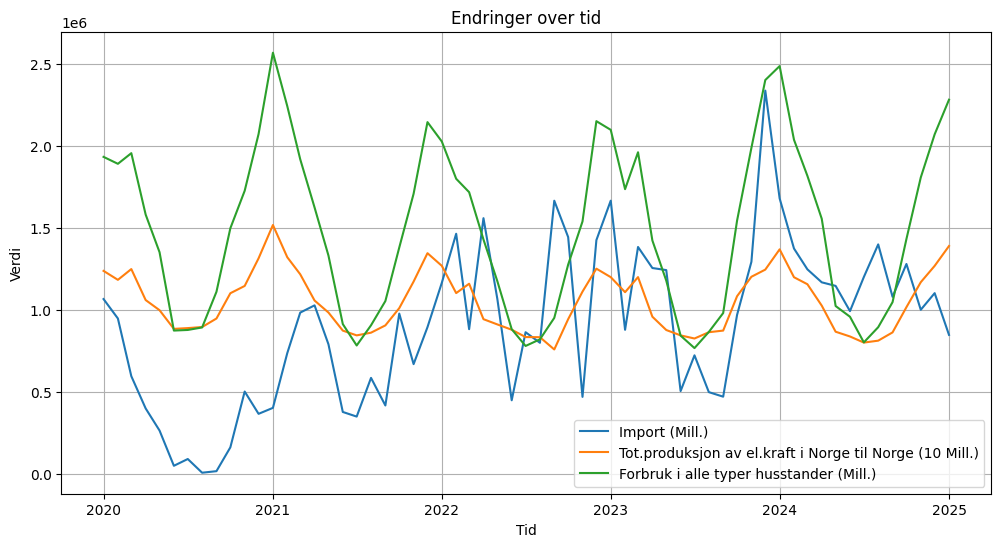

In [15]:
import matplotlib.pyplot as plt

# Konverter 'Tid' til datetime-objekter for bedre plotting
pivot_df['Tid'] = pd.to_datetime(pivot_df['Tid'], format='%YM%m')

# Velg kolonner for plotting
kolonner_for_plotting = ['Import (Mill.)', 'Tot.produksjon av el.kraft i Norge til Norge (10 Mill.)', 'Forbruk i alle typer husstander (Mill.)']

# Lag linjediagrammer
plt.figure(figsize=(12, 6)) # 
for kolonne in kolonner_for_plotting:
    plt.plot(pivot_df['Tid'], pivot_df[kolonne], label=kolonne)

plt.xlabel('Tid')
plt.ylabel('Verdi')
plt.title('Endringer over tid')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
gjennomsnitt_verdi_df_yx = df_yx['Verdi'].mean()
print(gjennomsnitt_verdi_df_yx)

1006443.8488372093


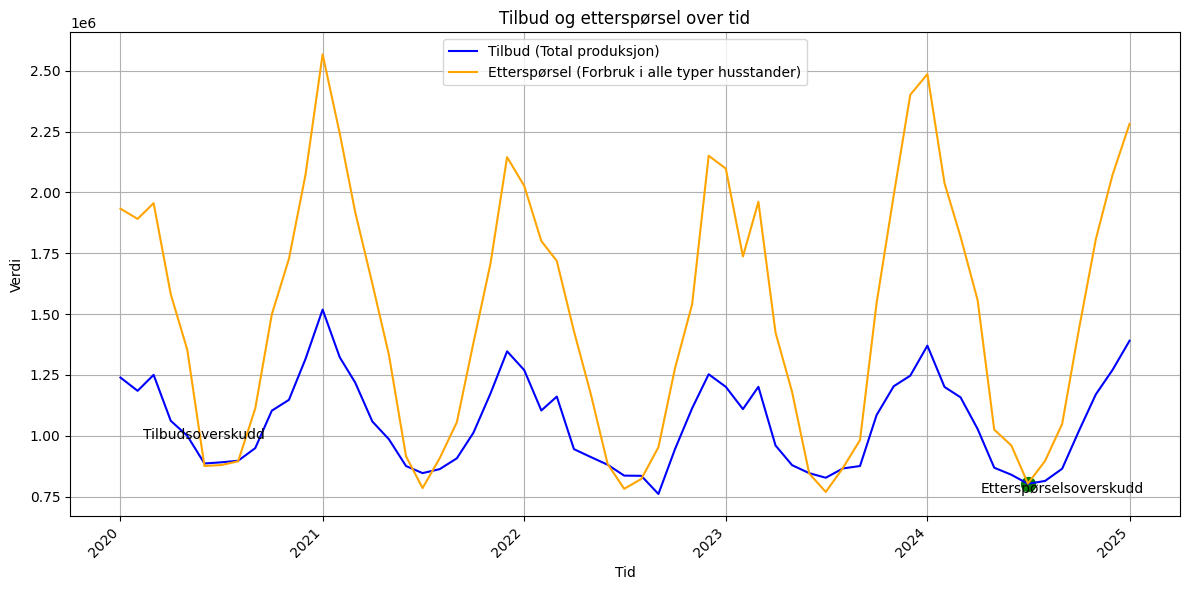

In [17]:
# Antar at df_pivot allerede er definert fra tidligere steg
# Konverter Tid til datetime
pivot_df['Tid'] = pd.to_datetime(pivot_df['Tid'], format='%YM%m')

# Plot
plt.figure(figsize=(12, 6))

# Plot tilbud og etterspørsel
plt.plot(pivot_df['Tid'], pivot_df['Tot.produksjon av el.kraft i Norge til Norge (10 Mill.)'], label='Tilbud (Total produksjon)', color='blue')
plt.plot(pivot_df['Tid'], pivot_df['Forbruk i alle typer husstander (Mill.)'], label='Etterspørsel (Forbruk i alle typer husstander)', color='orange')

# Finn krysningspunkt
diff = abs(pivot_df['Tot.produksjon av el.kraft i Norge til Norge (10 Mill.)'] - pivot_df['Forbruk i alle typer husstander (Mill.)'])
min_diff_index = diff.idxmin()
plt.scatter(pivot_df['Tid'].loc[min_diff_index], pivot_df['Tot.produksjon av el.kraft i Norge til Norge (10 Mill.)'].loc[min_diff_index], color='green', marker='o', s=100)

# Etiketter og tittel
plt.xlabel('Tid')
plt.ylabel('Verdi')
plt.title('Tilbud og etterspørsel over tid')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')

# Annotasjoner for overskudd
plt.annotate('Tilbudsoverskudd', xy=(pivot_df['Tid'].iloc[5], max(pivot_df['Tot.produksjon av el.kraft i Norge til Norge (10 Mill.)'].iloc[5], pivot_df['Forbruk i alle typer husstander (Mill.)'].iloc[5]) + 100000), ha='center')
plt.annotate('Etterspørselsoverskudd', xy=(pivot_df['Tid'].iloc[-5], min(pivot_df['Tot.produksjon av el.kraft i Norge til Norge (10 Mill.)'].iloc[-5], pivot_df['Forbruk i alle typer husstander (Mill.)'].iloc[-5]) - 100000), ha='center')

plt.tight_layout()
plt.show()

In [18]:
# Konverter 'Tid' til datetime-objekter
df_b['Tid'] = pd.to_datetime(df_b['Tid'], format='%YM%m')

# Konverter 'Tid' til kvartaler
df_b['Kvartal'] = df_b['Tid'].dt.to_period('Q')

# Grupperer dataene etter kvartal og summerer verdiene, ekskluder 'Tid' kolonnen
kvartal_df = df_b.groupby('Kvartal').agg({'Verdi': 'sum'}).reset_index()
# Endre kvartalene fra Q1, Q2, Q3, Q4 til K1, K2, K3, K4
kvartal_df['Kvartal'] = kvartal_df['Kvartal'].astype(str).str.replace('Q', 'K')
# Filtrer ut data fra før 2020, kunne også gjort det med noe som fjernet NA/0 verdier
kvartal_df = kvartal_df[(kvartal_df['Kvartal'] >= '2020K1') & (kvartal_df['Kvartal'] <= '2025K1')]
# Skriv ut resultatet
print(kvartal_df)

    Kvartal      Verdi
80   2020K1  5779815.5
81   2020K2  3810141.0
82   2020K3  2885872.0
83   2020K4  5297686.0
84   2021K1  6728432.0
85   2021K2  3872880.0
86   2021K3  2747906.5
87   2021K4  5234266.5
88   2022K1  5544755.0
89   2022K2  3490040.0
90   2022K3  2557034.5
91   2022K4  4967719.5
92   2023K1  5795673.0
93   2023K2  3448636.5
94   2023K3  2618376.0
95   2023K4  5933876.0
96   2024K1  6340989.5
97   2024K2  3541218.5
98   2024K3  2748428.0
99   2024K4  5311469.0
100  2025K1  2281341.5


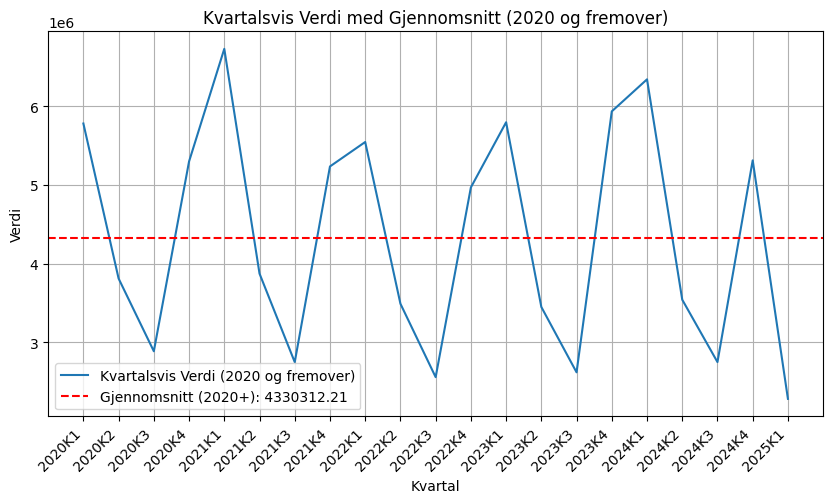

In [19]:
import re

# Antar at kvartal_df allerede er definert
# Kvartalene er nå i formatet "2020K1", "2021K2", osv.

# Oppdatert funksjon for å trekke ut årstall
def extract_year(kvartal_string):
    match = re.search(r'(\d{4})K\d', kvartal_string)
    if match:
        return int(match.group(1))
    return None

# Opprett en ny kolonne 'År'
kvartal_df['År'] = kvartal_df['Kvartal'].apply(extract_year)

# Filtrer DataFrame for å inkludere data fra 2020 og utover
kvartal_df_filtered = kvartal_df[kvartal_df['År'] >= 2020]

# Beregn gjennomsnittet av 'Verdi' for den filtrerte DataFrame
gjennomsnitt_verdi_filtered = kvartal_df_filtered['Verdi'].mean()

# Plotting the filtered data
plt.figure(figsize=(10, 5))
plt.plot(kvartal_df_filtered['Kvartal'], kvartal_df_filtered['Verdi'], label='Kvartalsvis Verdi (2020 og fremover)')
plt.axhline(y=gjennomsnitt_verdi_filtered, color='r', linestyle='--', label=f'Gjennomsnitt (2020+): {gjennomsnitt_verdi_filtered:.2f}')
plt.xlabel('Kvartal')
plt.ylabel('Verdi')
plt.title('Kvartalsvis Verdi med Gjennomsnitt (2020 og fremover)')
plt.legend()
plt.grid(True)
plt.xticks(ticks=range(len(kvartal_df_filtered['Kvartal'])), labels=kvartal_df_filtered['Kvartal'], rotation=45, ha='right')
plt.show()

In [20]:
# Filtrer dataframe for kvartaler som starter med 202xK1
winter_kvartal_df = kvartal_df_filtered[kvartal_df_filtered['Kvartal'].str.contains(r'^202\dK1')]

# Beregn gjennomsnittet av 'Verdi'
winter_mean = winter_kvartal_df['Verdi'].mean()

print(winter_mean)

5411834.416666667


In [21]:
# Filtrer dataframe for kvartaler som starter med 202xK1
summer_kvartal_df = kvartal_df_filtered[kvartal_df_filtered['Kvartal'].str.contains(r'^202\dK3')]

# Beregn gjennomsnittet av 'Verdi'
summer_mean = summer_kvartal_df['Verdi'].mean()

print(summer_mean)

2711523.4


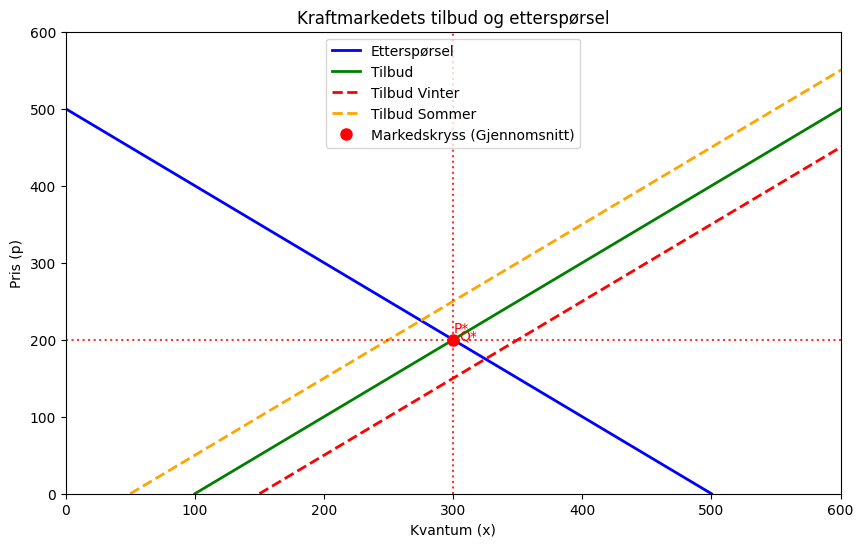

In [22]:
# Importer nødvendige biblioteker
import numpy as np
import matplotlib.pyplot as plt

# Definer etterspørsel- og tilbudsfunksjoner
def etterspørsel(p):
    return 500 - p  

def tilbud(p):
    return 100 + p  

def tilbud_w(p):
    return 150 + p  

def tilbud_s(p):
    return 50 + p  

# Funksjon for å lage aksene
def create_ax():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_ylabel('Pris (p)')
    ax.set_xlabel('Kvantum (x)')
    ax.set_xlim(0, 600)
    ax.set_ylim(0, 600)
    return fig, ax

# Opprett plott
fig, ax = create_ax()

priser = np.linspace(0, 600, 1000)

# Beregn etterspørsel og tilbudsverdier
etterspørsel_kvantum = [etterspørsel(p) for p in priser]
tilbud_kvantum = [tilbud(p) for p in priser]
tilbud_w_kvantum = [tilbud_w(p) for p in priser]
tilbud_s_kvantum = [tilbud_s(p) for p in priser]

# Plott tilbud og etterspørsel
ax.plot(etterspørsel_kvantum, priser, label='Etterspørsel', linewidth=2, color='blue')
ax.plot(tilbud_kvantum, priser, label='Tilbud', linewidth=2, color='green')
ax.plot(tilbud_w_kvantum, priser, label='Tilbud Vinter', linewidth=2, linestyle='dashed', color='red')
ax.plot(tilbud_s_kvantum, priser, label='Tilbud Sommer', linewidth=2, linestyle='dashed', color='orange')

# Finn markedskryssene
def finn_markedskryss(f1, f2):
    for p in priser:
        if abs(f1(p) - f2(p)) < 1e-2:
            return p, f1(p)
    return None, None

mk_gjennomsnitt = finn_markedskryss(etterspørsel, tilbud)
mk_vinter = finn_markedskryss(etterspørsel, tilbud_w)
mk_sommer = finn_markedskryss(etterspørsel, tilbud_s)

markedskryss = [
    (mk_gjennomsnitt, 'red', 'Gjennomsnitt'),
    (mk_vinter, 'purple', 'Vinter'),
    (mk_sommer, 'brown', 'Sommer')
]

# Marker markedskryssene med stiplete linjer
for ((pris, kvantum), farge, label) in markedskryss:
    if pris is not None:
        ax.plot(kvantum, pris, 'o', color=farge, markersize=8, label=f'Markedskryss ({label})')
        ax.axvline(x=kvantum, linestyle='dotted', color=farge, alpha=0.8)
        ax.axhline(y=pris, linestyle='dotted', color=farge, alpha=0.8)
        ax.text(kvantum + 5, pris, f'Q*', fontsize=10, color=farge)
        ax.text(kvantum, pris + 10, f'P*', fontsize=10, color=farge)

# Legg til tittel og legend
ax.set_title('Kraftmarkedets tilbud og etterspørsel')
ax.legend(loc='best')

plt.show()

In [23]:
pivot_df

Produkt,Tid,Forbruk i alle typer husstander (Mill.),Import (Mill.),Tot.produksjon av el.kraft i Norge til Norge (10 Mill.)
0,2020-01-01,1933112.5,1067388.0,1238988.9
1,2020-02-01,1890974.5,949147.0,1184475.6
2,2020-03-01,1955728.5,597807.0,1250099.7
3,2020-04-01,1581818.5,401557.0,1061401.3
4,2020-05-01,1352738.5,266950.0,999660.7
...,...,...,...,...
56,2024-09-01,1048552.5,1081035.0,864439.8
57,2024-10-01,1433127.0,1281038.0,1018117.0
58,2024-11-01,1807900.0,1002181.0,1170148.9
59,2024-12-01,2070442.0,1103533.0,1269602.8


In [24]:
# Beregn kvartalsvise gjennomsnitt
kvartalsvise_gjennomsnitt = []
for i in range(0, len(pivot_df), 4):
    kvartal = pivot_df['Forbruk i alle typer husstander (Mill.)'].iloc[i:i+4]
    gjennomsnitt = kvartal.sum() / 4
    kvartalsvise_gjennomsnitt.append(gjennomsnitt)

# Lag en ny DataFrame med kvartalsvise gjennomsnitt
forbruk_gjen_df = pd.DataFrame({'Kvartalsvis Gjennomsnitt': kvartalsvise_gjennomsnitt})

# Generer kvartalsbetegnelser
kvartaler = ['2020K1', '2020K2', '2020K3', '2020K4', '2021K1', '2021K2', '2021K3', '2021K4', '2022K1', '2022K2', '2022K3', '2022K4', '2023K1', '2023K2', '2023K3', '2023K4', '2024K1', '2024K2', '2024K3', '2024K4']
kvartaler = kvartaler[:len(forbruk_gjen_df)]  # Tilpass lengden på kvartalslisten

# Legg til kvartalsbetegnelser i forbruk_gjen_df
forbruk_gjen_df['Kvartal'] = kvartaler

# Omorganiser kolonnene slik at 'Kvartal' kommer først
forbruk_gjen_df = forbruk_gjen_df[['Kvartal', 'Kvartalsvis Gjennomsnitt']]
print(forbruk_gjen_df)

   Kvartal  Kvartalsvis Gjennomsnitt
0   2020K1               1840408.500
1   2020K2               1000590.250
2   2020K3               1602379.875
3   2020K4               2088369.875
4   2021K1                985115.125
5   2021K2               1572386.250
6   2021K3               1743684.750
7   2021K4                916060.125
8   2022K1               1480142.375
9   2022K2               1804942.875
10  2022K3                915161.125
11  2022K4               1729036.375
12  2023K1               1974349.750
13  2023K2                921171.125
14  2023K3               1590005.375
15  2023K4                570335.375


In [25]:
# Sett Tid som index
pivot_df = pivot_df.set_index('Tid')

In [26]:
# Beregn kvartalsvis gjennomsnitt med resampling
forbruk_gjen_df = pivot_df['Forbruk i alle typer husstander (Mill.)'].resample('QE').mean().reset_index()

# Konverter kvartalene til ønsket format (f.eks. 2024K1, 2024K2 osv.)
forbruk_gjen_df['Kvartal'] = forbruk_gjen_df['Tid'].dt.year.astype(str) + 'K' + forbruk_gjen_df['Tid'].dt.quarter.astype(str)

# Behold kun nødvendige kolonner
forbruk_gjen_df = forbruk_gjen_df[['Kvartal', 'Forbruk i alle typer husstander (Mill.)']]

# Gi kolonnen et mer beskrivende navn
forbruk_gjen_df.rename(columns={'Forbruk i alle typer husstander (Mill.)': 'Kvartalsvis Gjennomsnitt'}, inplace=True)

# Rund av til hele tall
forbruk_gjen_df['Kvartalsvis Gjennomsnitt'] = forbruk_gjen_df['Kvartalsvis Gjennomsnitt'].round(0).astype(int)

# Fjern siste rad (2025K1)
forbruk_gjen_df = forbruk_gjen_df.iloc[:-1]

print(forbruk_gjen_df)

   Kvartal  Kvartalsvis Gjennomsnitt
0   2020K1                   1926605
1   2020K2                   1270047
2   2020K3                    961957
3   2020K4                   1765895
4   2021K1                   2242811
5   2021K2                   1290960
6   2021K3                    915969
7   2021K4                   1744756
8   2022K1                   1848252
9   2022K2                   1163347
10  2022K3                    852345
11  2022K4                   1655906
12  2023K1                   1931891
13  2023K2                   1149546
14  2023K3                    872792
15  2023K4                   1977959
16  2024K1                   2113663
17  2024K2                   1180406
18  2024K3                    916143
19  2024K4                   1770490


In [27]:
# Filtrer df_p til å matche perioden i forbruk_gjen_df (2020K1 - 2024K4)
df_p = df_p[df_p['Tid'].isin(forbruk_gjen_df['Kvartal'])]

# Sjekk at lengdene til df_p og forbruk_gjen_df stemmer overens
if len(df_p) != len(forbruk_gjen_df):
    print("Advarsel: Dataene har ulike lengder. Sjekk at begge inneholder samme kvartaler.")
    print(f"Lengde df_p: {len(df_p)}, Lengde forbruk_gjen_df: {len(forbruk_gjen_df)}")
    df_p = df_p.iloc[:len(forbruk_gjen_df)]  # Justerer ved å kutte overskytende rader

# Lag en ny DataFrame for elastisitet
elas_df = pd.DataFrame({
    'Tid': df_p['Tid'].values,  # Bruk .values for å sikre korrekt tilordning
    'Pris': df_p['Verdi'].values,
    'Konsum': forbruk_gjen_df['Kvartalsvis Gjennomsnitt'].values
})

# Beregn prosentvis endring (unngå NaN ved å fylle de første radene)
elas_df['Pris Endring (%)'] = elas_df['Pris'].pct_change().fillna(0) * 100
elas_df['Konsum Endring (%)'] = elas_df['Konsum'].pct_change().fillna(0) * 100

# Beregn elastisitet, unngå divisjon med null
elas_df['Elastisitet'] = elas_df['Konsum Endring (%)'] / elas_df['Pris Endring (%)']
elas_df.replace([float('inf'), -float('inf')], 0, inplace=True)  # Bytt ut uendelige verdier med 0

# Vis resultatet
print(elas_df)

       Tid   Pris   Konsum  Pris Endring (%)  Konsum Endring (%)  Elastisitet
0   2020K1   32.7  1926605          0.000000            0.000000          NaN
1   2020K2   18.2  1270047        -44.342508          -34.078496     0.768529
2   2020K3   17.6   961957         -3.296703          -24.258157     7.358308
3   2020K4   27.1  1765895         53.977273           83.573174     1.548303
4   2021K1   65.3  2242811        140.959410           27.007042     0.191594
5   2021K2   62.2  1290960         -4.747320          -42.440090     8.939800
6   2021K3   93.1   915969         49.678457          -29.047453    -0.584709
7   2021K4  132.0  1744756         41.783029           90.481992     2.165520
8   2022K1  143.1  1848252          8.409091            5.931832     0.705407
9   2022K2  151.6  1163347          5.939902          -37.056906    -6.238639
10  2022K3  261.6   852345         72.559367          -26.733382    -0.368435
11  2022K4  207.0  1655906        -20.871560           94.276496

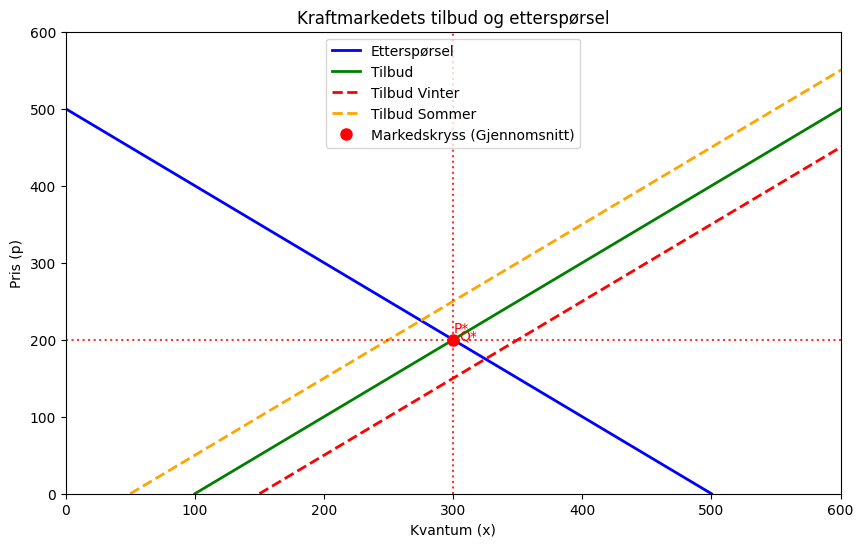

In [28]:
# Importer nødvendige biblioteker
import numpy as np
import matplotlib.pyplot as plt

# Definer etterspørsel- og tilbudsfunksjoner
def etterspørsel(p):
    return 500 - p  

def tilbud(p):
    return 100 + p  

def tilbud_w(p):
    return 150 + p  

def tilbud_s(p):
    return 50 + p  

# Funksjon for å lage aksene
def create_ax():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_ylabel('Pris (p)')
    ax.set_xlabel('Kvantum (x)')
    ax.set_xlim(0, 600)
    ax.set_ylim(0, 600)
    return fig, ax

# Opprett plott
fig, ax = create_ax()

priser = np.linspace(0, 600, 1000)

# Beregn etterspørsel og tilbudsverdier
etterspørsel_kvantum = [etterspørsel(p) for p in priser]
tilbud_kvantum = [tilbud(p) for p in priser]
tilbud_w_kvantum = [tilbud_w(p) for p in priser]
tilbud_s_kvantum = [tilbud_s(p) for p in priser]

# Plott tilbud og etterspørsel
ax.plot(etterspørsel_kvantum, priser, label='Etterspørsel', linewidth=2, color='blue')
ax.plot(tilbud_kvantum, priser, label='Tilbud', linewidth=2, color='green')
ax.plot(tilbud_w_kvantum, priser, label='Tilbud Vinter', linewidth=2, linestyle='dashed', color='red')
ax.plot(tilbud_s_kvantum, priser, label='Tilbud Sommer', linewidth=2, linestyle='dashed', color='orange')

# Finn markedskryssene
def finn_markedskryss(f1, f2):
    for p in priser:
        if abs(f1(p) - f2(p)) < 1e-2:
            return p, f1(p)
    return None, None

mk_gjennomsnitt = finn_markedskryss(etterspørsel, tilbud)
mk_vinter = finn_markedskryss(etterspørsel, tilbud_w)
mk_sommer = finn_markedskryss(etterspørsel, tilbud_s)

markedskryss = [
    (mk_gjennomsnitt, 'red', 'Gjennomsnitt'),
    (mk_vinter, 'purple', 'Vinter'),
    (mk_sommer, 'brown', 'Sommer')
]

# Marker markedskryssene med stiplete linjer
for ((pris, kvantum), farge, label) in markedskryss:
    if pris is not None:
        ax.plot(kvantum, pris, 'o', color=farge, markersize=8, label=f'Markedskryss ({label})')
        ax.axvline(x=kvantum, linestyle='dotted', color=farge, alpha=0.8)
        ax.axhline(y=pris, linestyle='dotted', color=farge, alpha=0.8)
        ax.text(kvantum + 5, pris, f'Q*', fontsize=10, color=farge)
        ax.text(kvantum, pris + 10, f'P*', fontsize=10, color=farge)

# Legg til tittel og legend
ax.set_title('Kraftmarkedets tilbud og etterspørsel')
ax.legend(loc='best')

plt.show()

# oppgave 3

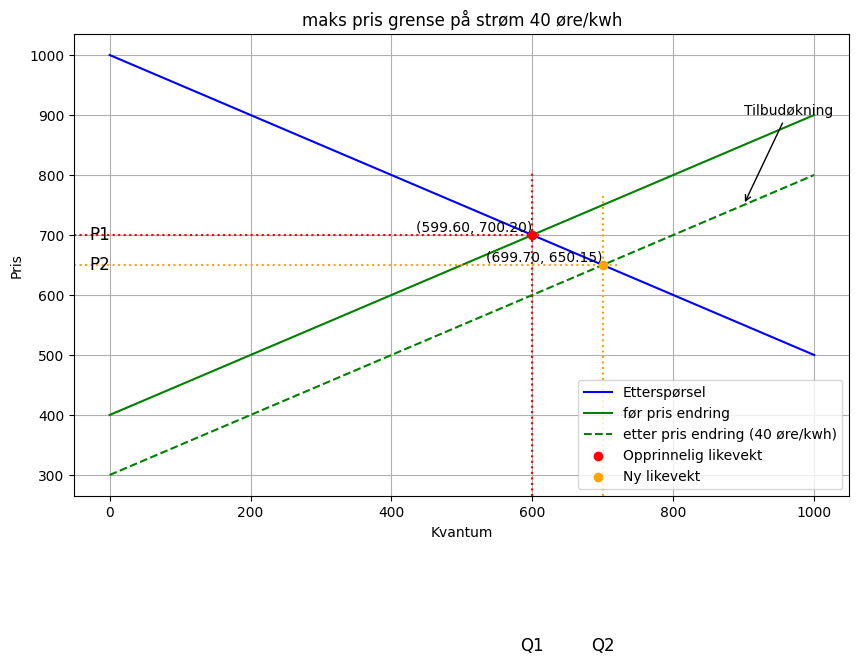

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

kvantum = np.linspace(0, 1000, 1000) # 1000 kvantumverdier mellom 0 og 1000
pris_etterspørsel = 1000 - 0.5 * kvantum  # Etterspørselsfunksjonen
pris_tilbud = 400 + 0.5 * kvantum   # Tilbudsfunksjonen
pris_nytt_tilbud = 300 + 0.5 * kvantum  # Ny tilbudsfunksjon

kryss_index = np.argwhere(np.isclose(pris_etterspørsel, pris_tilbud, atol=1)).flatten() #  Finn verdien til krysset mellom etterspørsel og tilbud
nytt_kryss_index = np.argwhere(np.isclose(pris_etterspørsel, pris_nytt_tilbud, atol=1)).flatten() # Finn verdien til krysset mellom etterspørsel og nytt tilbud

if len(kryss_index) > 0: # Sjekk om det er et kryss
    kryss_kvantum = kvantum[kryss_index][0] # Hent kvantumverdien
    kryss_pris = pris_etterspørsel[kryss_index][0] # Hent prisverdien
else:
    kryss_kvantum = None # Sett til None hvis det ikke er noe kryss
    kryss_pris = None # Sett til None hvis det ikke er noe kryss

if len(nytt_kryss_index) > 0: # Sjekk om det er et kryss
    nytt_kryss_kvantum = kvantum[nytt_kryss_index][0] # Hent kvantumverdien
    nytt_kryss_pris = pris_etterspørsel[nytt_kryss_index][0] # Hent prisverdien
else:
    nytt_kryss_kvantum = None # Sett til None hvis det ikke er noe kryss
    nytt_kryss_pris = None # Sett til None hvis det ikke er noe kryss

plt.figure(figsize=(10, 6))
plt.plot(kvantum, pris_etterspørsel, label='Etterspørsel', color='blue') # linje
plt.plot(kvantum, pris_tilbud, label='før pris endring', color='green')  # linje
plt.plot(kvantum, pris_nytt_tilbud, label='etter pris endring (40 øre/kwh)', color='green', linestyle='dashed')  # Stiplet linje

if kryss_kvantum is not None: 
    plt.scatter(kryss_kvantum, kryss_pris, color='red', zorder=5, label='Opprinnelig likevekt') # Scatter plot
    plt.text(kryss_kvantum, kryss_pris, f'({kryss_kvantum:.2f}, {kryss_pris:.2f})',  
             horizontalalignment='right', verticalalignment='bottom') 

if nytt_kryss_kvantum is not None:
    plt.scatter(nytt_kryss_kvantum, nytt_kryss_pris, color='orange', zorder=5, label='Ny likevekt') # Scatter plot
    plt.text(nytt_kryss_kvantum, nytt_kryss_pris, f'({nytt_kryss_kvantum:.2f}, {nytt_kryss_pris:.2f})',  
             horizontalalignment='right', verticalalignment='bottom')

plt.axvline(x=kryss_kvantum, ymin=0, ymax=kryss_pris/1000, color='red', linestyle='dotted') # Vertikal linje
plt.axhline(y=kryss_pris, xmin=0, xmax=kryss_kvantum/1000, color='red', linestyle='dotted') # Horisontal linje
plt.axvline(x=nytt_kryss_kvantum, ymin=0, ymax=nytt_kryss_pris/1000, color='orange', linestyle='dotted') # Vertikal linje
plt.axhline(y=nytt_kryss_pris, xmin=0, xmax=nytt_kryss_kvantum/1000, color='orange', linestyle='dotted') # Horisontal linje
plt.text(kryss_kvantum, 0, 'Q1', verticalalignment='bottom', horizontalalignment='center', fontsize=12, color='black') # velger plassering og farge
plt.text(nytt_kryss_kvantum, 0, 'Q2', verticalalignment='bottom', horizontalalignment='center', fontsize=12, color='black') # velger plassering og farge
plt.text(0, kryss_pris, 'P1', verticalalignment='center', horizontalalignment='right', fontsize=12, color='black') # velger plassering og farge
plt.text(0, nytt_kryss_pris, 'P2', verticalalignment='center', horizontalalignment='right', fontsize=12, color='black') # velger plassering og farge
plt.annotate("Tilbudøkning", xy=(900, pris_nytt_tilbud[900]), xytext=(900, pris_tilbud[900] + 50),
             arrowprops=dict(arrowstyle="->", color="black"), fontsize=10) # lager en pil med tekst
plt.xlabel('Kvantum')
plt.ylabel('Pris')
plt.title('maks pris grense på strøm 40 øre/kwh')
plt.legend()
plt.grid(True)
plt.show()


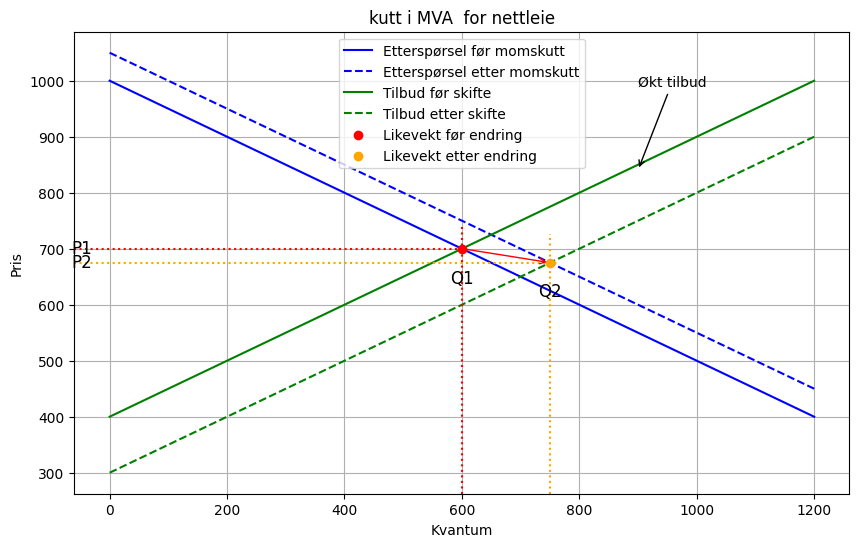

In [ ]:
# Importer nødvendige biblioteker
import numpy as np
import matplotlib.pyplot as plt

# Definer kvantum og prisfunksjoner
kvantum = np.linspace(0, 1200, 1000) # 1000 kvantumverdier mellom 0 og 1200
pris_etterspørsel_før = 1000 - 0.5 * kvantum   # Etterspørselsfunksjon før endring
pris_etterspørsel_etter = 1050 - 0.5 * kvantum  # Etterspørselsfunksjon etter endring
pris_tilbud_før = 400 + 0.5 * kvantum   # Tilbudsfunksjon før endring
pris_tilbud_etter = 300 + 0.5 * kvantum  # Større positivt skifte i tilbudet nedover

# Finn markedskryssene før og etter
def finn_kryss(pris_etterspørsel, pris_tilbud): # Funksjon for å finne kryss
    kryss_index = np.argwhere(np.isclose(pris_etterspørsel, pris_tilbud, atol=1)).flatten() # Finn verdien til krysset mellom etterspørsel og tilbud
    if len(kryss_index) > 0: # Sjekk om det er et kryss
    return kvantum[kryss_index][0], pris_etterspørsel[kryss_index][0] # Hent kvantum- og prisverdien
    return None, None

kryss_kvantum_før, kryss_pris_før = finn_kryss(pris_etterspørsel_før, pris_tilbud_før) # Før endring
kryss_kvantum_etter, kryss_pris_etter = finn_kryss(pris_etterspørsel_etter, pris_tilbud_etter) # Etter endring

# Plot figur
plt.figure(figsize=(10, 6))
plt.plot(kvantum, pris_etterspørsel_før, label='Etterspørsel før momskutt', color='blue') # linje
plt.plot(kvantum, pris_etterspørsel_etter, label='Etterspørsel etter momskutt', color='blue', linestyle='dashed') # Stiplet linje
plt.plot(kvantum, pris_tilbud_før, label='Tilbud før skifte', color='green') # linje
plt.plot(kvantum, pris_tilbud_etter, label='Tilbud etter skifte', color='green', linestyle='dashed') # Stiplet linje

# Marker likevektene
if kryss_kvantum_før is not None: # Sjekk om det er et kryss
    plt.scatter(kryss_kvantum_før, kryss_pris_før, color='red', zorder=5, label='Likevekt før endring') # Scatter plot
if kryss_kvantum_etter is not None: # Sjekk om det er et kryss
    plt.scatter(kryss_kvantum_etter, kryss_pris_etter, color='orange', zorder=5, label='Likevekt etter endring') # Scatter plot

# Stiplede linjer for likevekter
plt.axvline(x=kryss_kvantum_før, ymin=0, ymax=kryss_pris_før/1200, color='red', linestyle='dotted') # Vertikal linje
plt.axhline(y=kryss_pris_før, xmin=0, xmax=kryss_kvantum_før/1200, color='red', linestyle='dotted') # Horisontal linje
plt.axvline(x=kryss_kvantum_etter, ymin=0, ymax=kryss_pris_etter/1200, color='orange', linestyle='dotted') # Vertikal linje
plt.axhline(y=kryss_pris_etter, xmin=0, xmax=kryss_kvantum_etter/1200, color='orange', linestyle='dotted') # Horisontal linje

# Tekstetiketter
plt.text(kryss_kvantum_før, kryss_pris_før * 0.9, 'Q1', verticalalignment='bottom', horizontalalignment='center', fontsize=12, color='black') # velger plassering og farge
plt.text(kryss_kvantum_etter, kryss_pris_etter * 0.9, 'Q2', verticalalignment='bottom', horizontalalignment='center', fontsize=12, color='black') # velger plassering og farge
plt.text(-30, kryss_pris_før, 'P1', verticalalignment='center', horizontalalignment='right', fontsize=12, color='black') # velger plassering og farge
plt.text(-30, kryss_pris_etter, 'P2', verticalalignment='center', horizontalalignment='right', fontsize=12, color='black') # velger plassering og farge

# Annotations for skifte i tilbudet
plt.annotate("Økt tilbud", xy=(900, pris_tilbud_etter[900]), xytext=(900, pris_tilbud_før[900] + 50),
             arrowprops=dict(arrowstyle="->", color="black"), fontsize=10)# Lager pil

# Piler mellom likevektene
if kryss_kvantum_før is not None and kryss_kvantum_etter is not None: # Sjekk om det er et kryss
    plt.annotate("", xy=(kryss_kvantum_etter, kryss_pris_etter),  # Plassering
                 xytext=(kryss_kvantum_før, kryss_pris_før), 
                 arrowprops=dict(arrowstyle="->", color="red"))

# Plot detaljer
plt.xlabel('Kvantum')
plt.ylabel('Pris')
plt.title('kutt i MVA  for nettleie')
plt.legend()
plt.grid(True)
plt.show()
